# DecisionTree
DecisionTree is a supervised machine learning algorithm used for classification and regression tasks. It creates a tree-like model where each internal node represents a decision based on an attribute, and each leaf node corresponds to a predicted outcome. The algorithm recursively splits the data into subsets to optimize predictions. Decision Trees are known for their interpretability but can be prone to overfitting, so pruning and ensemble techniques are often used to enhance performance and generalization.

## Key Steps

### 1) Import the required library

### 2) Import data

### 3) Data cleaning
        1) Check missing values 
        2) Check Duplicate
        3) Check out layers by using 'IQR' method
        4) Check structure or unstructured data
        5) Check data type in a correct format

### 4) Exploratory Data Analysis (EDA)
        1) Plot the data and check the relations

### 5) Encode the data (Convert categorical data to numerical data) (if it necessary we use else skip it)
        1) Label encoding
            It is used for binary categorical data or binary ordered categorical data
        2) One hot encoding
            It is used to Multiclass categorical data for nominal data or unordered data
            
### 6) Split the data      
         Futures (X - axis) (2D Matrix)
         Targe (Y - axis) (1D Array)
         Train, Test, Split, Random state

### 7) Scaling the data (Scaling only for multi-column with different range data) (note: - Scale only future)
           1) Import model
           2) Initialize
           3) Fit (Learning process)
           4) Transform
          
### 8) Finding the best depth of the Decision Tree
            1) Regression - R^2 value and high cross validation score
            2) Classification - Accuracy score high cross validation score
                    
### 9) Apply Machine learning algorithm
           1) Import model
           2) Initialize
           3) Fit (learning process)
           4) Predict

### 10) Evaluation matric (Check whether the model is correct or not)
           1) Regression - The evaluation metric for regression is R^2 between minus infinite to 1 
            A higher the R^2 is a better model
            
           2) Classification - The evaluation metric for classification is
               1) Accuracy score [ Higher accuracy is a better model (The value should near to 1) ]
               2) F1 score [ F1 score between 0 (low) to 1 (high), Higher F1 score better the model ]

# Decision Tree Classifier

In [1]:
# 1) Import the required library

# File read
import pandas as pd
import numpy as np

# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Data spliting
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Find the best depth of the Decision Tree
from sklearn.model_selection import cross_val_score

# Apply Machine learning algorithm
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Evaluation matric
from sklearn.metrics import accuracy_score, f1_score


In [2]:
# 2) Import data
data = pd.read_csv('womens breast center.csv')

In [3]:
data 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# 3) Data cleaning
    # 1) Check missing values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Check the Shape Of the Data
data.shape

(569, 33)

In [6]:
# Compare the shape of the data "Unnamed: 32" column has an equal amount of NaN values so drop the "Unnamed: 32" column  
data.drop('Unnamed: 32',inplace=True,axis=1)
# The "id" column also not important so drop "id" column
data.drop('id',inplace=True,axis=1)

In [7]:
data.isnull().sum()
# Missing values cleaned

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# 3) Data cleaning
    # 2) Check Duplicate
data.duplicated().sum()

0

In [9]:
# 3) Data cleaning
    # 3) Check out layers by using 'IQR' method
data.describe()
# All out layer, data is essential for the medical field so skip the step

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# 3) Data cleaning
    # 4) Check structure or unstructure data
data.shape

(569, 31)

In [11]:
# 3) Data cleaning
    # 5) Check data type in a correct format
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [12]:
# 4) EDA (Exploratory Data Analysis)
# not necessary

In [13]:
# 5) Encode the data(Convert categorical data to numerical data) 
#  Diagnosis (M = malignant, B = benign)   M = Cancer, B = No Cancer / Normal
# Replace 'M' with '1' and 'B' with '0' in 'diagnosis'
data['diagnosis'].replace({'M':1, 'B':0}, inplace=True)

In [14]:
# 6) Split the data (Data Pre processing)
x = data.loc[:,'radius_mean':]   # Futures (X - axis)(2D Matrix)
y = data['diagnosis']            # Targe  (Y - axis)(1D Array)

# from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [15]:
# Data Pre processing
# 7) Scaling the data (not mandatory) 

In [16]:
# 8) Find the best depth of the Decision Tree in the classification
best_depth = None
best_train_accuracy = 0.0
best_cross_val_score = 0.0

for depth in range(1, 21):
    # Create the Decision Tree classifier and fit the training data
    dtc = DecisionTreeClassifier(max_depth = depth)
    dtc.fit(x_train, y_train)
    
    # Calculate training accuracy
    y_pred = dtc.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_pred)
    
    # Create a fresh model for cross-validation, no need to fit again
    dtc_cv = DecisionTreeClassifier(max_depth=depth)
    
    # Calculate cross-validation score
    val_accuracy = cross_val_score(dtc_cv, x_train, y_train, cv=5).mean()

    print("Depth:", depth, "Training Accuracy:", train_accuracy, "Cross val score:", val_accuracy)

    # Check if the current model has a better cross-validation score than the best one so far
    if val_accuracy > best_cross_val_score:
        best_cross_val_score = val_accuracy
        best_depth = depth
        best_train_accuracy = train_accuracy

print("\nBest Depth:", best_depth, "Best Training Accuracy:", best_train_accuracy, "Best Cross val score:", best_cross_val_score)


Depth: 1 Training Accuracy: 0.9208791208791208 Cross val score: 0.887912087912088
Depth: 2 Training Accuracy: 0.9296703296703297 Cross val score: 0.9186813186813186
Depth: 3 Training Accuracy: 0.978021978021978 Cross val score: 0.9274725274725275
Depth: 4 Training Accuracy: 0.9956043956043956 Cross val score: 0.9340659340659341
Depth: 5 Training Accuracy: 0.9956043956043956 Cross val score: 0.9318681318681319
Depth: 6 Training Accuracy: 0.9978021978021978 Cross val score: 0.9186813186813186
Depth: 7 Training Accuracy: 1.0 Cross val score: 0.9098901098901099
Depth: 8 Training Accuracy: 1.0 Cross val score: 0.9186813186813187
Depth: 9 Training Accuracy: 1.0 Cross val score: 0.9120879120879121
Depth: 10 Training Accuracy: 1.0 Cross val score: 0.9076923076923077
Depth: 11 Training Accuracy: 1.0 Cross val score: 0.9164835164835166
Depth: 12 Training Accuracy: 1.0 Cross val score: 0.9142857142857143
Depth: 13 Training Accuracy: 1.0 Cross val score: 0.9142857142857143
Depth: 14 Training Accur

In [17]:
# 9) Apply Machine learning algorithm
    # 1) Import model
from sklearn.tree import DecisionTreeClassifier

    # 2) Initialize
dtc = DecisionTreeClassifier(max_depth = best_depth)
    
    # 3) Fit (learning process)
dtc.fit(x_train, y_train)

    # 4) Predict
y_pred = dtc.predict(x_test)

y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [18]:
# 10) Evaluate the model on the test set

# Calculate accuracy of the model
accuracy = dtc.score(x_test, y_test)
print("Accuracy of the model:", accuracy)

# Calculate accuracy of y_actual vs y_predict
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)
print("Test F1 Score: ", f1)

# Higher accuracy is a better model (The value should near to 1)
# F1 score between 0 (low) to 1 (high) 
# Higher F1 score better the model 

Accuracy of the model: 0.9473684210526315
Test Accuracy:  0.9473684210526315
Test F1 Score:  0.9302325581395349


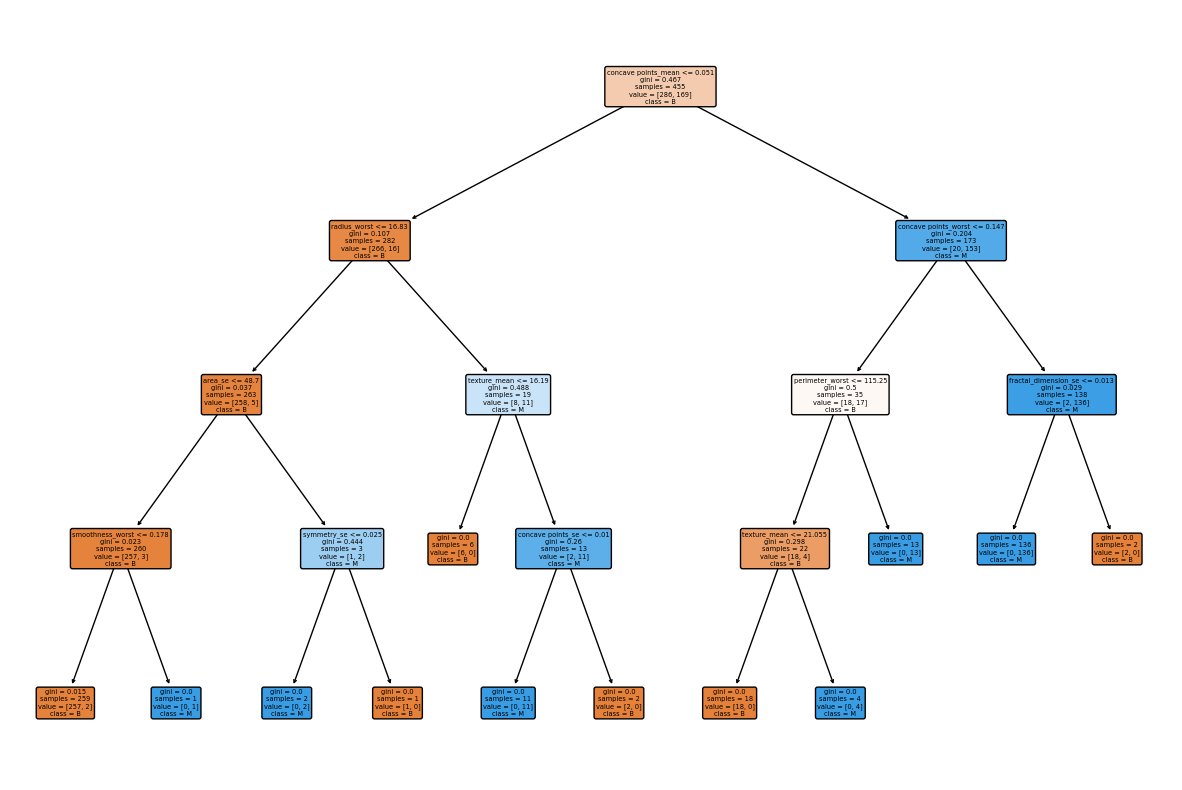

In [19]:
# Display and save the Decision Tree visualization as an image

# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Plot the Decision Tree with specified feature names, filled nodes, and rounded edges
plot_tree(dtc, feature_names=x.columns, filled=True, rounded=True, class_names=["B", "M"])

# Save the Decision Tree visualization as an image
# plt.savefig('decision_tree.png')

# Display the plot
plt.show()

# Decision Tree Regressor

In [20]:
# 1) Import the required library

# File read
import pandas as pd
import numpy as np

# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Data spliting
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Find the best depth of the Decision Tree
from sklearn.model_selection import cross_val_score

# Apply Machine learning algorithm
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

# Evaluation matric
from sklearn.metrics import  r2_score


In [21]:
# 2) Import data
data = pd.read_csv('Car miles per gallon.csv')

In [22]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [23]:
# 3) Data cleaning
    # 1) Check missing values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [24]:
# 3) Data cleaning
    # 2) Check Duplicate
data.duplicated().sum()

0

In [25]:
# 3) Data cleaning
    # 3) Check out layers by using 'IQR' method
data.describe()
# All out layer, data is essential

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [26]:
# 3) Data cleaning
    # 4) Check structure or unstructure data
data.shape

(398, 9)

In [27]:
# 3) Data cleaning
    # 5) Check data type in a correct format
data.dtypes
# 'horsepower' in the wrong data type

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [28]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [29]:
data = data.loc[data['horsepower'] != '?', :]
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [30]:
data['horsepower'].astype('int')

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 392, dtype: int32

In [31]:
# 4) EDA (Exploratory Data Analysis)
# not necessary

In [32]:
# 5) Encode the data(Convert categorical data to numerical data) 
# It doesn't have categorical data so it is not necessary and skip the step

In [33]:
# 6) Split the data (Data Pre processing)
x = data.loc[:,'cylinders':'origin']   # Futures (X - axis)(2D Matrix)
y = data['mpg']   # Targe  (Y - axis)(1D Array)

# from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((313, 7), (79, 7), (313,), (79,))

In [34]:
# Data Pre processing
# 7) Scaling the data (not mandatory)

In [35]:
# 8) Find the best depth of the Decision Tree in the Regressor

best_depth = None
best_mean_val_r2 = -np.inf  # Initialize with a very low value to ensure any calculated r2 score will be higher
best_train_r2 = 0.0

for depth in range(1, 21):
    # Create the Decision Tree Regressor and fit the training data
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(x_train, y_train)
    
    # Calculate R-squared score on the training set
    y_pred = dtr.predict(x_train)
    train_r2 = r2_score(y_train, y_pred )
    
    # Create a fresh model for cross-validation, no need to fit again
    dtr_cv = DecisionTreeRegressor(max_depth=depth)
    
    # Perform cross-validation on the training data and calculate the mean R-squared score
    val_r2_scores = cross_val_score(dtr_cv, x_train, y_train, cv=10, scoring='r2')
    mean_val_r2 = np.mean(val_r2_scores)
    
    print("Depth:", depth, "Train R2:", train_r2, "Val R2:", mean_val_r2)
    
    # Update the best values if a better depth is found
    if mean_val_r2 > best_mean_val_r2:
        best_depth = depth
        best_mean_val_r2 = mean_val_r2
        best_train_r2 = train_r2

print("\nBest Depth:", best_depth, "Best Training R2:", best_train_r2, "Best Mean Validation R2:", best_mean_val_r2)


Depth: 1 Train R2: 0.5924463414605282 Val R2: 0.5310774241450013
Depth: 2 Train R2: 0.7572875682480276 Val R2: 0.6623327767574478
Depth: 3 Train R2: 0.8401133075852176 Val R2: 0.7525335027667823
Depth: 4 Train R2: 0.8930716698139086 Val R2: 0.7910797567746501
Depth: 5 Train R2: 0.9307439366933947 Val R2: 0.7963088243918698
Depth: 6 Train R2: 0.9555172890857665 Val R2: 0.7740447668513127
Depth: 7 Train R2: 0.9714956458192116 Val R2: 0.7604053939263087
Depth: 8 Train R2: 0.981908630116182 Val R2: 0.7591631086957278
Depth: 9 Train R2: 0.9889572910364726 Val R2: 0.7658830713263507
Depth: 10 Train R2: 0.9947951682516081 Val R2: 0.7558417623949785
Depth: 11 Train R2: 0.9978283884699852 Val R2: 0.7651925946893725
Depth: 12 Train R2: 0.9989772476729861 Val R2: 0.7552216709681068
Depth: 13 Train R2: 0.9996702315193379 Val R2: 0.7648244309783332
Depth: 14 Train R2: 0.9999379753740502 Val R2: 0.7601138418202512
Depth: 15 Train R2: 0.9999959494121828 Val R2: 0.7486760261141076
Depth: 16 Train R2: 

In [36]:
# 9) Apply Machine learning algorithm
    # 1) Import model
from sklearn.tree import DecisionTreeRegressor

    # 2) Initialize
dtr = DecisionTreeRegressor()
    
    # 3) Fit (learning process)
dtr.fit(x_train, y_train)

    # 4) Predict
y_pred = dtr.predict(x_test)

y_pred

array([25. , 19. , 31. , 30. , 27. , 29. , 11. , 31.5, 18. , 26. , 15. ,
       20.3, 15.5, 29. , 16.5, 27. , 18. , 32.4, 31.3, 34. , 23. , 36. ,
       31. , 17. , 31. , 28. , 19. , 18. , 26. , 25. , 16. , 20.5, 23.9,
       28. , 14. , 31. ,  9. , 23. , 14. , 13. , 14. , 29. , 36. , 25. ,
       16. , 11. , 19. , 46.6, 25. , 30. , 14. , 21. , 21. , 34. , 38. ,
       16. , 19. , 19. , 24. , 23. , 12. , 22. , 28.8, 22. , 23.9, 26. ,
       24.5, 30. , 23.9, 14. , 25. , 14. , 23.8, 19. , 20.2, 24. , 13. ,
       18. , 24. ])

In [37]:
# 10) Evaluate the model on the test set
        # The evaluation metric for regression  is r^2 between minus infinite to 1
        # A higher the R^2 is a better model
        
# Calculate accuracy of the model by using R^2
R_square_score = r2_score(y_test,y_pred)
print('R^2 Value of model:',R_square_score)

R^2 Value of model: 0.7723876253561984


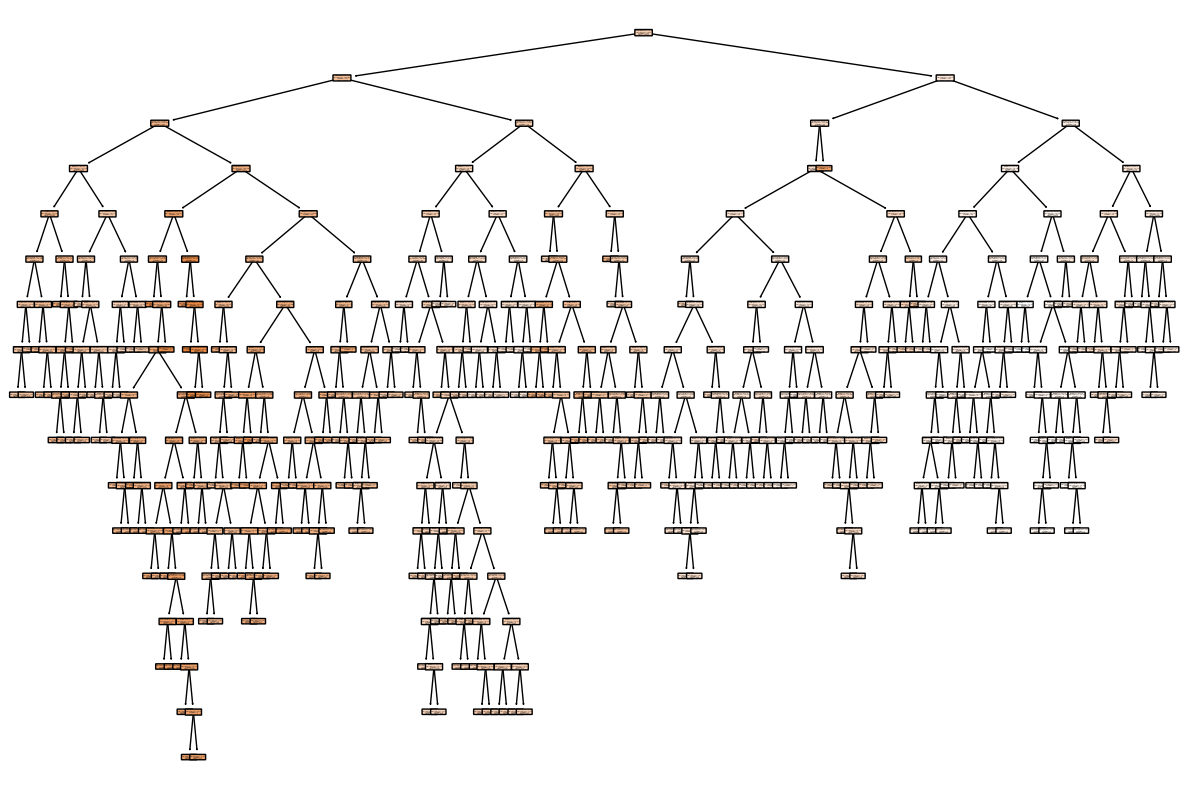

In [38]:
# Display and save the Decision Tree visualization as an image

# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Plot the Decision Tree with specified feature names, filled nodes, and rounded edges
plot_tree(dtr, feature_names=x.columns, filled=True, rounded=True)

# Save the Decision Tree visualization as an image
# plt.savefig('decision_tree_regressio.png')

# Display the plot
plt.show()
